In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [330]:
# Importing the dataset
df = pd.read_csv('Lutsenko_data.csv')

In [331]:
df

,Age,Sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,7.7,22.1,3.23,106.0,12.1,69.0,0
1,32,m,38.5,18.0,24.7,4.80,74.0,15.6,76.5,0
2,32,m,46.9,36.2,52.6,5.20,86.0,33.2,79.3,0
3,32,m,43.2,30.6,22.6,4.74,80.0,33.8,75.7,0
4,32,m,39.2,32.6,24.8,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,5.9,110.3,6.30,55.7,650.9,68.5,1
611,64,f,24.0,2.9,44.4,3.02,63.0,35.9,71.3,1
612,64,f,29.0,3.5,99.0,3.63,66.7,64.2,82.0,1
613,46,f,33.0,39.0,62.0,4.20,52.0,50.0,71.0,1


##### Как мы видим, переменную Sex необходимо отформатировать к 0 и 1.

In [332]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)


# Encoding categorical data
df = encoding_char(df)
df

,Age,Sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT,Category
0,32,0,38.5,7.7,22.1,3.23,106.0,12.1,69.0,0
1,32,0,38.5,18.0,24.7,4.80,74.0,15.6,76.5,0
2,32,0,46.9,36.2,52.6,5.20,86.0,33.2,79.3,0
3,32,0,43.2,30.6,22.6,4.74,80.0,33.8,75.7,0
4,32,0,39.2,32.6,24.8,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,5.9,110.3,6.30,55.7,650.9,68.5,1
611,64,1,24.0,2.9,44.4,3.02,63.0,35.9,71.3,1
612,64,1,29.0,3.5,99.0,3.63,66.7,64.2,82.0,1
613,46,1,33.0,39.0,62.0,4.20,52.0,50.0,71.0,1


##### Наши данные нужно подготовить, т.е. проверить наличие выбросов и пропусков.

In [333]:
# Для начала определим, есть ли выбросы
mean_Age = np.mean(df['Age'], axis=0)
sd_Age = np.std(df['Age'], axis=0)

mean_ALB = np.mean(df['ALB'], axis=0)
sd_ALB = np.std(df['ALB'], axis=0)

mean_ALT = np.mean(df['ALT'], axis=0)
sd_ALT = np.std(df['ALT'], axis=0)

mean_AST = np.mean(df['AST'], axis=0)
sd_AST = np.std(df['AST'], axis=0)

mean_CHOL = np.mean(df['CHOL'], axis=0)
sd_CHOL = np.std(df['CHOL'], axis=0)

mean_CREA = np.mean(df['CREA'], axis=0)
sd_CREA = np.std(df['CREA'], axis=0)

mean_GGT = np.mean(df['GGT'], axis=0)
sd_GGT = np.std(df['GGT'], axis=0)

mean_PROT = np.mean(df['PROT'], axis=0)
sd_PROT = np.std(df['PROT'], axis=0)

counter_Age = 0
counter_ALB = 0
counter_ALT = 0
counter_AST = 0
counter_CHOL = 0
counter_CREA = 0
counter_GGT = 0
counter_PROT = 0

for Age, ALB, ALT, AST, CHOL, CREA, GGT, PROT in zip(df['Age'], df['ALB'], df['ALT'], df['AST'], df['CHOL'], df['CREA'], df['GGT'], df['PROT']):
    if not mean_Age - 3*sd_Age <= Age <= mean_Age + 3*sd_Age:
        counter_Age += 1
    if not mean_ALB - 3*sd_ALB <= ALB <= mean_ALB + 3*sd_ALB:
        counter_ALB += 1
    if not mean_ALT - 3*sd_ALT <= counter_ALT <= mean_ALT + 3*sd_ALT:
        counter_ALT += 1
    if not mean_AST - 3*sd_AST <= counter_AST <= mean_AST + 3*sd_AST:
        counter_AST += 1
    if not mean_CHOL - 3*sd_CHOL <= counter_CHOL <= mean_CHOL + 3*sd_CHOL:
        counter_CHOL += 1
    if not mean_CREA - 3*sd_CREA <= counter_CREA <= mean_CREA + 3*sd_CREA:
        counter_CREA += 1
    if not mean_GGT - 3*sd_GGT <= counter_GGT <= mean_GGT + 3*sd_GGT:
            counter_GGT += 1
    if not mean_PROT - 3*sd_PROT <= counter_PROT <= mean_PROT + 3*sd_PROT:
        counter_PROT += 1
    
counter_dicts = {'counter_Age': counter_Age,
                'counter_ALB': counter_ALB,
                'counter_ALT': counter_ALT,
                'counter_AST': counter_AST,
                'counter_CHOL': counter_CHOL,
                'counter_CREA': counter_CREA,
                'counter_GGT': counter_GGT,
                'counter_PROT': counter_PROT}
print(counter_dicts)

{'counter_Age': 0, 'counter_ALB': 14, 'counter_ALT': 0, 'counter_AST': 0, 'counter_CHOL': 2, 'counter_CREA': 0, 'counter_GGT': 0, 'counter_PROT': 56}


##### Избавляемся от выборосов# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [334]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)


# Outliers
df = outliers(df)
df.describe()

,Age,Sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT,Category
count,615.000000,615.000000,614.000000,614.000000,615.000000,605.000000,615.000000,615.000000,614.000000,615.000000
mean,47.408130,0.386992,41.619034,27.374917,33.139378,5.365605,79.023852,36.816201,72.117792,0.133333
std,10.055105,0.487458,5.368663,18.312519,23.652140,1.118583,19.472858,37.237116,5.090528,0.340211
min,19.000000,0.000000,24.278307,0.900000,10.600000,1.969914,8.000000,4.500000,55.836230,0.000000
25%,39.000000,0.000000,38.800000,16.400000,21.600000,4.610000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,0.000000,41.950000,23.000000,25.900000,5.300000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,1.000000,45.200000,33.075000,32.900000,6.060000,88.000000,40.200000,75.400000,0.000000
max,77.000000,1.000000,58.495497,104.859881,134.058412,8.758481,230.556303,203.516384,87.434438,1.000000


In [335]:
# проверка пропущенных значений
df.isnull().sum()

Age          0
Sex          0
ALB          1
ALT          1
AST          0
CHOL        10
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64

##### Избавимся от пропущенных значений, заменив их на средние в колонках

In [336]:
#Deal with missing data
from sklearn.impute import SimpleImputer
df[['ALB']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALB']]).round()
df[['ALT']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALT']]).round()
df[['CHOL']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['CHOL']]).round()
df[['PROT']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['PROT']]).round()

df.isnull().sum()

Age         0
Sex         0
ALB         0
ALT         0
AST         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

## Logistic Regression

In [337]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

##### Прошкалируем данные

In [338]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

##### Далее нам необходимо определиться, какие именно переменные использовать для модели

In [339]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.320513
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.195     
Dependent Variable: y                AIC:              333.3844  
Date:               2020-10-30 00:16 BIC:              371.1707  
No. Observations:   492              Log-Likelihood:   -157.69   
Df Model:           8                LL-Null:          -195.80   
Df Residuals:       483              LLR p-value:      2.8171e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.1169      0.1550    -0.7545    0.4506    -0.4206     0.1868
x2    -0.0125      0.1697    -0.0734    0.9415    -0.3

##### Имееем:исходя из P целесообразнее всего использовать х4, х5, х8. Это соответствует ALT,AST,GGT

In [307]:
# Features selection
X_train = X_train[:,[3,4,7]]
X_test = X_test[:,[3,4,7]]

In [340]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [341]:
# Predicting the Test set results
y_pred = slr.predict(X_test)
slr.score(X_test,y_test)

0.9512195121951219

In [342]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  5  10]]


##### Как мы видим, исходя из параметра accuracy, что равен 0,93, модель отлично справилась со своей задачей. Так же мы имеем 8 ложных предсказаний.

## k-Nearest Neighbors

##### Для построения этой модели нам первостепенно важно определить k.

Minimum error:- 0.04878048780487805 at K = 0


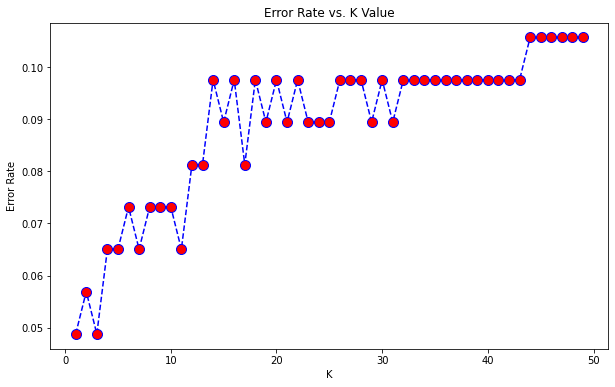

In [343]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

##### Выберем значение k = 5

In [344]:
# Fitting K-NN to the Training set
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.9349593495934959

In [345]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  8   7]]


##### Как мы видим, исходя из параметра accuracy, что равен 0,976, модель отлично справилась со своей задачей. Так же мы имеем 3 ложных предсказаний.

## Support Vector Machine

In [346]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 10).fit(X_train, y_train)


# Predicting the Test set results
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

0.975609756097561

In [347]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  3  12]]


##### Как мы видим, исходя из параметра accuracy, что равен 0,976, модель отлично справилась со своей задачей. Так же мы имеем 3 ложных предсказаний.

## Naive Bayes

In [348]:
# Fitting Naive Bayes to the Training set (2 variables)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

y_pred = nb.predict(X_test)
nb.score(X_test,y_test)

0.9349593495934959

In [349]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   5]
 [  3  12]]


##### Как мы видим, исходя из параметра accuracy, что равен 0,935, модель отлично справилась со своей задачей. Так же мы имеем 8 ложных предсказаний.

## Classification Tree

##### Во избежание переобучения, необходимо определить размер дерева

In [350]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

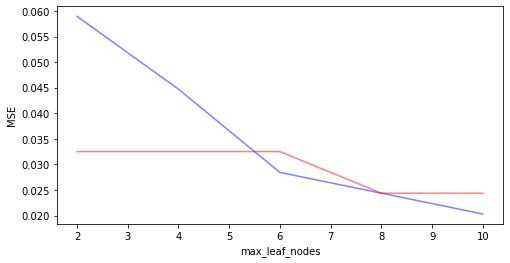

In [351]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

##### Теперь нам нужно выбрать оптимальную точку. Как мы видим, качество результатов тренировочной выборки растет нестремительно до 8, далее резко падает. Качество результатов тестовой выборки резко падает все время. Выбираем размер дерева = 6.

In [352]:
# Fitting Classification Tree to the Training set
ct = DecisionTreeClassifier(max_leaf_nodes = 6, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.975609756097561

In [353]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  3  12]]


##### Как мы видим, исходя из параметра accuracy, что равен 0,976, модель отлично справилась со своей задачей. Так же мы имеем 3 ложных предсказаний.

## NN Classification

In [354]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [358]:
X_train = X_train[:,[3,4,7]]
X_test = X_test[:,[3,4,7]]

In [359]:
# Initialising the ANN 3-2-1
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Adding the output layer
cnn1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [360]:
# Fitting the ANN to the Training set
cnn1.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
50/50 [==============================] - 0s 936us/step - loss: 0.6827 - accuracy: 0.8638
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.8638
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.8638
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.8638
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.8638
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8638
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8638
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8638
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8638
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8638
Epoch 1

In [361]:
# Predicting the Test set results
y_pred = cnn1.predict(X_test)
y_pred = (y_pred > 0.5)

In [362]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  4  11]]


##### Как мы видим, исходя из параметра accuracy, что равен 0,959, модель отлично справилась со своей задачей. Так же мы имеем 5 ложных предсказаний.

### Абсолютно все модели классификации показали результаты, что больше 90% точности. Методы k-Nearest Neighbors, Support Vector Machine, Classification Tree справились с задачей приблизительно с одинаковой точностью, что равна 0,976 и имея всего 3 ложных предсказания.Немного менее качественный результат дала нейронная сеть (0,959 точности). Модели Naive Bayes, Logistic Regression показали себя незначительно хуже - accuracy = 0,93.

## Hierarchical Clustering

In [187]:
df = df.drop(['Category'], axis=1)

In [188]:
df

,Age,Sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT
0,32,0,38.0,8.0,22.1,3.0,106.0,12.100000,69.0
1,32,0,38.0,18.0,24.7,5.0,74.0,15.600000,76.0
2,32,0,47.0,36.0,52.6,5.0,86.0,33.200000,79.0
3,32,0,43.0,31.0,22.6,5.0,80.0,33.800000,76.0
4,32,0,39.0,33.0,24.8,4.0,76.0,29.900000,69.0
...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,6.0,110.3,6.0,55.7,203.516384,68.0
611,64,1,24.0,3.0,44.4,3.0,63.0,35.900000,71.0
612,64,1,29.0,4.0,99.0,4.0,66.7,64.200000,82.0
613,46,1,33.0,39.0,62.0,4.0,52.0,50.000000,71.0


##### Для того что бы уровнять наши переменные и ни один из параметров не перетягивал все на себя, проведет шкалирование.

In [189]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Age','sex','ALB','ALT','AST','CHOL','CREA','GGT', 'PROT']).round(4)

In [190]:
df

,Age,sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT
0,0.2241,0.0,0.4118,0.0673,0.0931,0.1429,0.4403,0.0382,0.4194
1,0.2241,0.0,0.4118,0.1635,0.1142,0.4286,0.2966,0.0558,0.6452
2,0.2241,0.0,0.6765,0.3365,0.3402,0.4286,0.3505,0.1442,0.7419
3,0.2241,0.0,0.5588,0.2885,0.0972,0.4286,0.3235,0.1472,0.6452
4,0.2241,0.0,0.4412,0.3077,0.1150,0.2857,0.3055,0.1276,0.4194
...,...,...,...,...,...,...,...,...,...
610,0.7414,1.0,0.2353,0.0481,0.8076,0.5714,0.2143,1.0000,0.3871
611,0.7759,1.0,0.0000,0.0192,0.2738,0.1429,0.2471,0.1578,0.4839
612,0.7759,1.0,0.1471,0.0288,0.7160,0.2857,0.2638,0.3000,0.8387
613,0.4655,1.0,0.2647,0.3654,0.4163,0.2857,0.1977,0.2286,0.4839


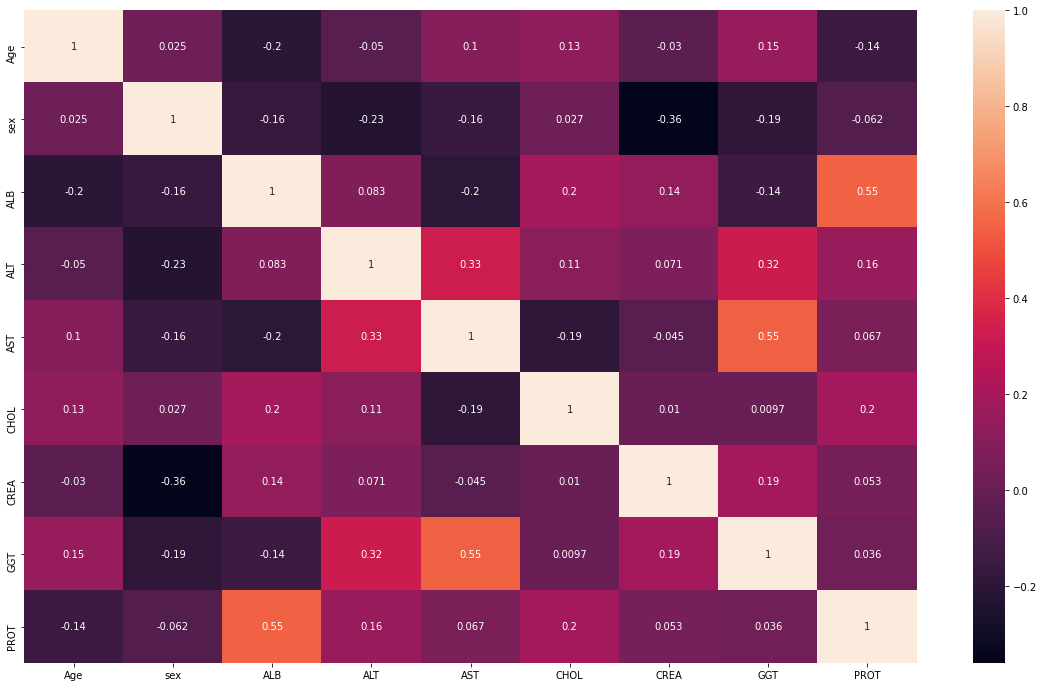

In [191]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, annot=True)
plt.show()

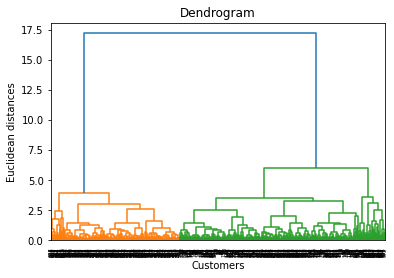

In [192]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##### Исходя из длины полученных веток, имеем: оптимальнее всего рассматривать 9 кластеров. Но стоит заметить, что такое кол-во тяжело в интерпретации.

In [193]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

##### Попробуем отобрать меньшее число переменных, выбрав ALB, AST

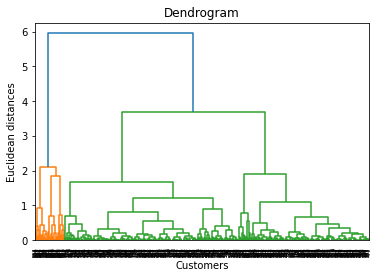

In [194]:
# Less features
X = df.iloc[:, [2, 4]]

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [225]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc_opt = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [226]:
hc_opt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## K-Means Clustering

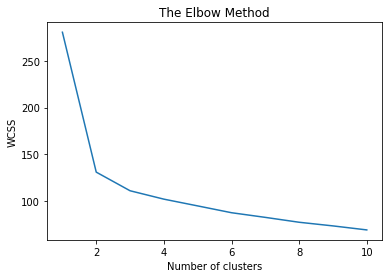

In [197]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Исходя из графика выше, резко уходить вниз прямая начинает с 2. Но на всякий случай попробуем посмотреть подробнее диапазон от 2 до 4 используя другой метод.

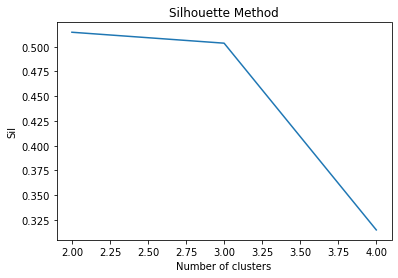

2:0.5146613686173553
3:0.5036152250024468
4:0.3149365150653946


In [198]:

# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 5):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 5), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

##### Оставим значение 4.

In [199]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','sex','ALB','ALT','AST','CHOL','CREA','GGT', 'PROT']).round(decimals=4)

,Age,sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT
0,0.3948,-0.0000,0.6054,0.3070,0.1604,0.5017,0.3474,0.1431,0.5927
1,0.4903,1.0000,0.4889,0.1959,0.1319,0.4866,0.2810,0.1048,0.5068
2,0.6258,0.0000,0.4595,0.2096,0.1388,0.4571,0.3446,0.1373,0.4080
3,0.5552,0.0889,0.4196,0.4256,0.6717,0.4159,0.3140,0.6219,0.5455


In [200]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','sex','ALB','ALT','AST','CHOL','CREA','GGT', 'PROT']).round(decimals=1)

,Age,sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT
0,0.4,-0.0,0.6,0.3,0.2,0.5,0.3,0.1,0.6
1,0.5,1.0,0.5,0.2,0.1,0.5,0.3,0.1,0.5
2,0.6,0.0,0.5,0.2,0.1,0.5,0.3,0.1,0.4
3,0.6,0.1,0.4,0.4,0.7,0.4,0.3,0.6,0.5


In [202]:
df

,Age,sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT
0,0.2241,0.0,0.4118,0.0673,0.0931,0.1429,0.4403,0.0382,0.4194
1,0.2241,0.0,0.4118,0.1635,0.1142,0.4286,0.2966,0.0558,0.6452
2,0.2241,0.0,0.6765,0.3365,0.3402,0.4286,0.3505,0.1442,0.7419
3,0.2241,0.0,0.5588,0.2885,0.0972,0.4286,0.3235,0.1472,0.6452
4,0.2241,0.0,0.4412,0.3077,0.1150,0.2857,0.3055,0.1276,0.4194
...,...,...,...,...,...,...,...,...,...
610,0.7414,1.0,0.2353,0.0481,0.8076,0.5714,0.2143,1.0000,0.3871
611,0.7759,1.0,0.0000,0.0192,0.2738,0.1429,0.2471,0.1578,0.4839
612,0.7759,1.0,0.1471,0.0288,0.7160,0.2857,0.2638,0.3000,0.8387
613,0.4655,1.0,0.2647,0.3654,0.4163,0.2857,0.1977,0.2286,0.4839


##### Как мы видим исходя из результатов, переменные Age, ALB, ALT, CHOL, CREA, PROT особо не влияют на результат -> перестроим модель без них.

In [201]:
# Less features
X = df[:, [1, 4, 7]]

TypeError: '(slice(None, None, None), [1, 4, 7])' is an invalid key

In [228]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms_opt = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['sex','AST','GGT']).round(1)

,sex,AST,GGT
0,0.0,-0.2,-0.2
1,-0.4,2.4,2.3


In [222]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

-0.022884086849087697

In [ ]:
##### Итого: методы практически не пересекаются.

## SOM

In [207]:
# Feature Scaling
import SimpSOM as sps
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [208]:
X = df[:, [1, 4, 7]]

In [214]:
np.random.seed(605891282)
net = sps.somNet(10, 10, X, PBC=True)
net.train(0.01, 20000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


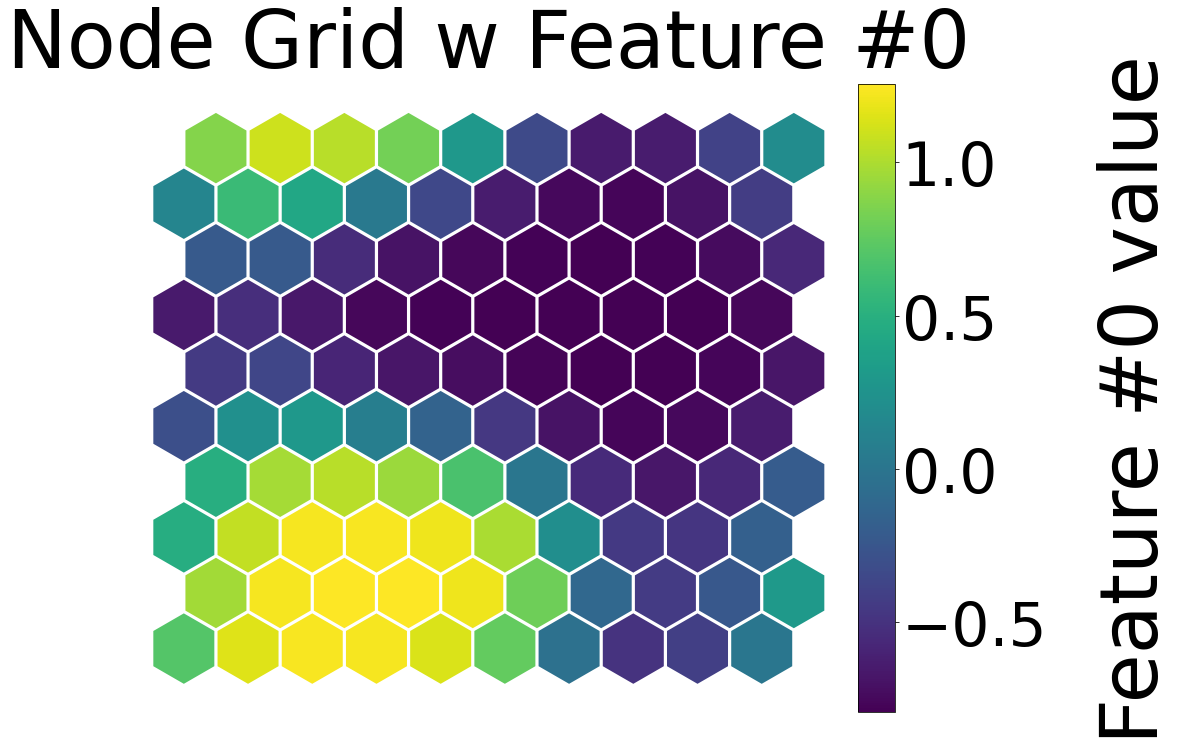

In [215]:
net.nodes_graph(colnum=0)

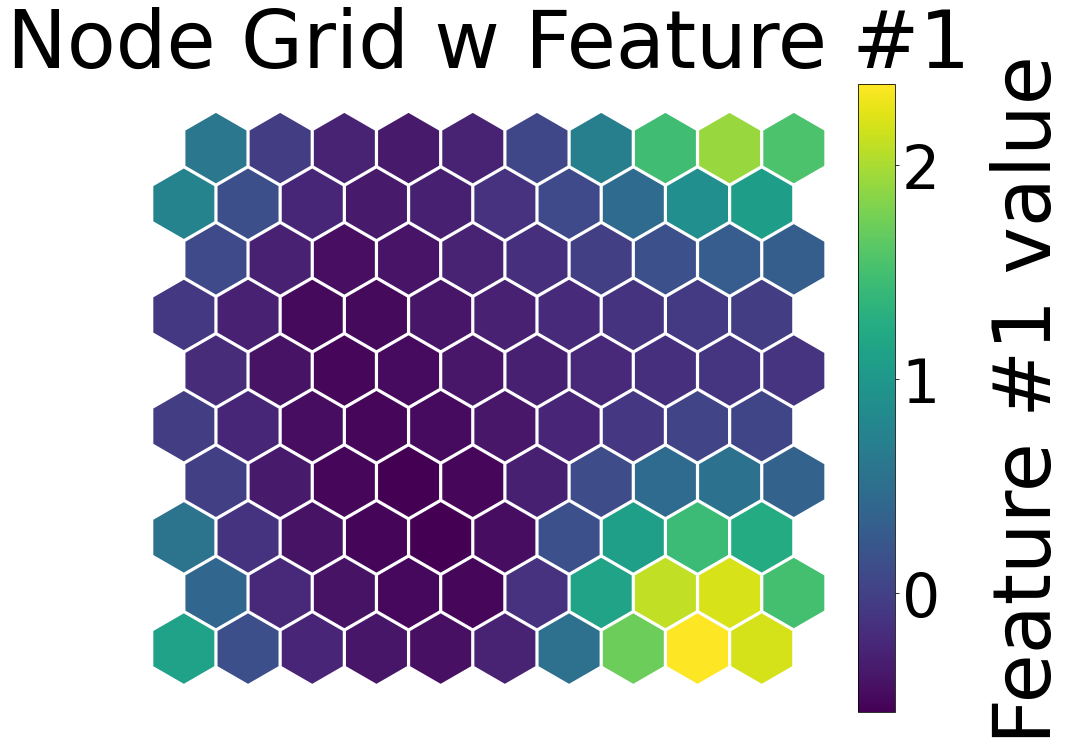

In [216]:
net.nodes_graph(colnum=1)

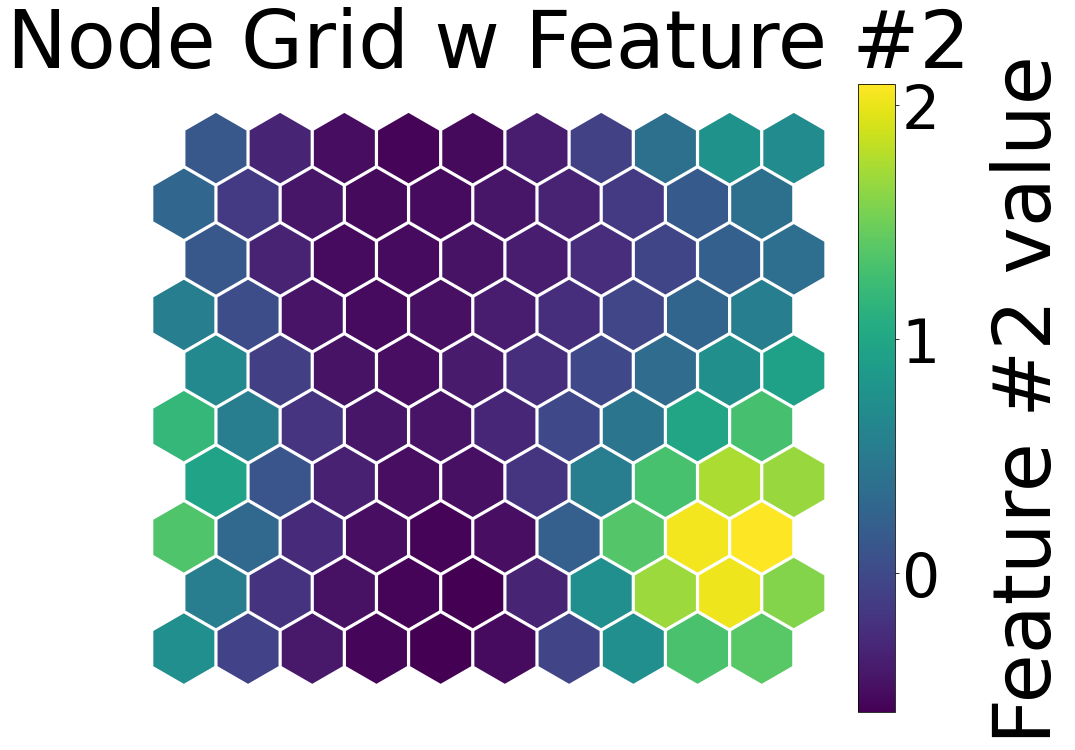

In [217]:
net.nodes_graph(colnum=2)

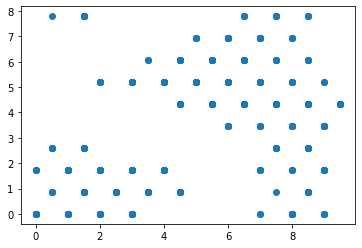

In [218]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

##### Очевидно выделяются 3 кластера

In [219]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

In [227]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_opt,kmeans.labels_)

0.5032101314210345

##### Методы пересекаются на 50%.